<a href="https://colab.research.google.com/github/jobsiggang/2024AIClass/blob/main/%EC%99%84%EB%A3%8C2_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B8%B0%EC%B4%88_%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 넘파이 활용 이미지 처리

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np


# 이미지 파일 경로
image_path = "/content/drive/MyDrive/image/butterfly.jpg"


# 이미지를 흑백으로 읽어오기
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# 이미지 크기 조정 (28x28로)
image = cv2.resize(image, (28, 28))


# 배열 출력 옵션 설정
np.set_printoptions(linewidth=np.inf)


# 이미지를 넘파이 배열로 변환
image_array = np.array(image)


# 변환된 넘파이 배열 출력
print(image_array)


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 255 255 255]
 [255 255 255 255 255 254 255 255 251 255 255 255 255 255 255 255 255 255 253 247  38  33 252 255 255 255 255 255]
 [255 255 255 255 255  23  16  16  31 255 255 255 255 255 255 255 255 255  57  19  21  28 254 255 255 255 255 255]
 [255 255 255 255 255  19  11   9   8  12 250 255 255 255 255 255 255 108  16  16  21  17 251 255 255 255 255 255]
 [255 255 255 255 255 250  10   8  11  13  44 255 250 255 159 255 251 131   5   9  27   4 255 255 255 255 255 255]
 [255 255 255 255 255 255   7   4   9  66 138 254 222 255 220 243  10 148  96  21  29 187 255 255 255 255 255 255]
 [255 255 255 255 255 255  10  11  40 109 126  16 250 254 241 245 149 131 119  52  22 252 255 255 255 255 255 255]
 [255 255 255 255 255 255  12  27 105 139 145 141 252 255 253  40 145 148 145  4

In [ ]:
!pwd

Original image shape: (183, 275, 3)
(183, 138)


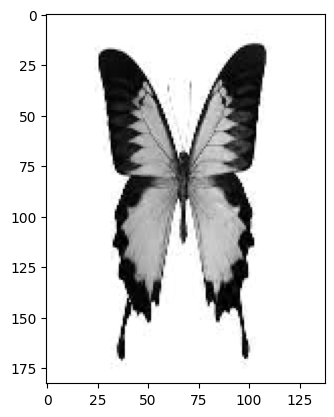

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 파일을 읽어와서 NumPy 배열로 변환합니다.
image = plt.imread("/content/drive/MyDrive/image/butterfly.jpg")
image_array = np.array(image)

# 원본 이미지 배열의 모양을 출력합니다.
print("Original image shape:", image_array.shape)
# output_image=image_array[:,::2,:] # 넘파이 슬라이싱
output_image=image_array[:,::2,1] # 넘파이 슬라이싱

print(output_image.shape)
plt.imshow(output_image, cmap='gray')
plt.show()
# # 이미지 배열을 전치합니다. (세로와 가로를 바꿉니다)
# transposed_image_array = np.transpose(image_array, axes=(1, 0, 2))

# # 전치된 이미지 배열의 모양을 출력합니다.
# print("Transposed image shape:", transposed_image_array.shape)

# # 이미지를 플로팅합니다. (흑백으로)
# plt.imshow(transposed_image_array, cmap='gray')
# plt.show()


Original image shape: (183, 275, 3)


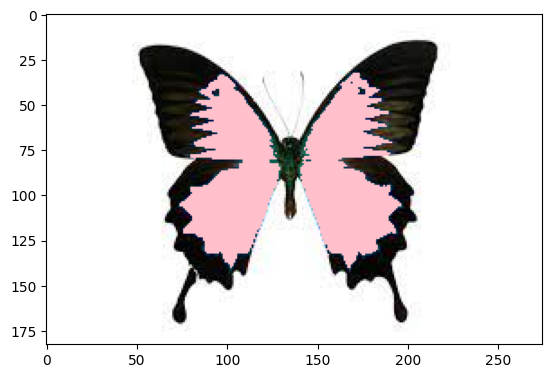

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 파일을 읽어와서 NumPy 배열로 변환합니다.
image = plt.imread("/content/drive/MyDrive/image/butterfly.jpg")
image_array = np.array(image)

# 원본 이미지 배열의 모양을 출력합니다.
print("Original image shape:", image_array.shape)

# 파란색 영역을 찾기 위한 범위 설정
blue_lower = np.array([0, 0, 100])  # 파란색의 하한값 설정 (RGB)
blue_upper = np.array([100, 250, 255])  # 파란색의 상한값 설정 (RGB)

# 각 픽셀이 파란색 범위에 속하는지 확인하여 마스크를 생성합니다.
blue_mask = np.all((image_array >= blue_lower) & (image_array <= blue_upper), axis=-1)

#np.all을 사용하지 않으면
# blue_mask = ((image_array[:, :, 0] >= 0) & (image_array[:, :, 0] <= 100) &  # R 채널 조건
#              (image_array[:, :, 1] >= 0) & (image_array[:, :, 1] <= 100) &  # G 채널 조건
#              (image_array[:, :, 2] >= 100) & (image_array[:, :, 2] <= 255))  # B 채널 조건

# 노란색 픽셀을 핑크로 변경합니다.
image_array[blue_mask] = [255, 192, 203]  # 핑크 (RGB)

# 변경된 이미지를 플로팅합니다.
plt.imshow(image_array)
plt.show()


In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/image/text.jpg'


# EasyOCR 로더 생성
reader = easyocr.Reader(['ko'])  # 언어 설정, GPU 사용 여부


# 이미지에서 문자 인식
result = reader.readtext(image_path)
print("\n",result)

#이미지 읽기
image = plt.imread(image_path)
#사각형 꼭지점 좌표
top_left=tuple(result[1][0][0])
bottom_right=tuple(result[1][0][2])
# 인식된 문자 영역에 파란색 박스 그리기
image=cv2.rectangle(image,top_left,bottom_right,(0,0,255),2)

# 인식된 문자 영역에 여러개 파란색 박스 그리기
# for r in result:
#   top_left=tuple(r[0][0])
#   bottom_right=tuple(r[0][2])
#   image=cv2.rectangle(image, top_left,bottom_right,(0,0,255),2)
plt.imshow(image)
plt.show()



In [ ]:
# print(result[1][1])
text=[]
for r in result:
  text.append(r[1])

print(text)

['현장', '수지 @편한세상', '공종 도장공사 탄성', '위치', '105 2602', '내용', '세탁실 작업 중', '일자', '2021.04.01']


In [ ]:
print(result[1])
a=tuple(result[1][0][0])
print(a)


([[81, 849], [271, 849], [271, 889], [81, 889]], '수지 @편한세상', 0.9677533410259689)
(81, 849)


In [ ]:
text=[]
for r in result:
  text.append(r[1])
print(text)
# 주어진 리스트

# 딕셔너리 생성
my_dict = {}
for i in range(0, len(text)-1, 2):  # 리스트의 짝수 인덱스를 키로, 홀수 인덱스를 값으로 지정
    my_dict[text[i]] = text[i + 1]


print(my_dict)


['현장', '수지 @편한세상', '공종 도장공사 탄성', '위치', '105 2602', '내용', '세탁실 작업 중', '일자', '2021.04.01']
{'현장': '수지 @편한세상', '공종 도장공사 탄성': '위치', '105 2602': '내용', '세탁실 작업 중': '일자'}


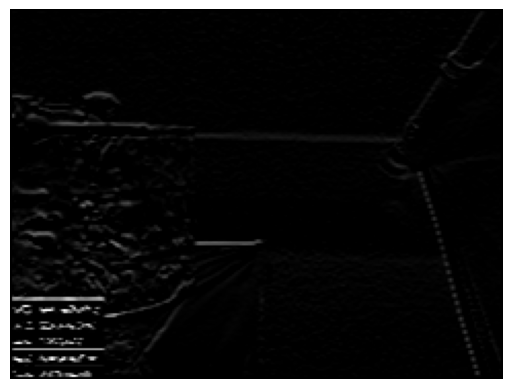

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 이미지를 읽어옵니다.
image = plt.imread("/content/drive/MyDrive/image/text.jpg")

# 이미지를 흑백으로 변환합니다.
gray_image = np.mean(image, axis=-1)

# 이미지의 크기를 450x450 픽셀로 조정합니다.
gray_image = gray_image[::6, ::6]

# 필터를 정의합니다. (수평 방향의 엣지를 감지하는 필터)
filter_matrix = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])

# 이미지와 필터를 합성곱 연산합니다.
output_image = np.zeros_like(gray_image)
for i in range(1, gray_image.shape[0] - 1):
    for j in range(1, gray_image.shape[1] - 1):
        convolution_result = np.sum(gray_image[i-1:i+2, j-1:j+2] * filter_matrix)
        output_image[i, j] = max(convolution_result, 0)  # 음수 값은 0으로 만듭니다.

# 결과를 플로팅합니다.
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()


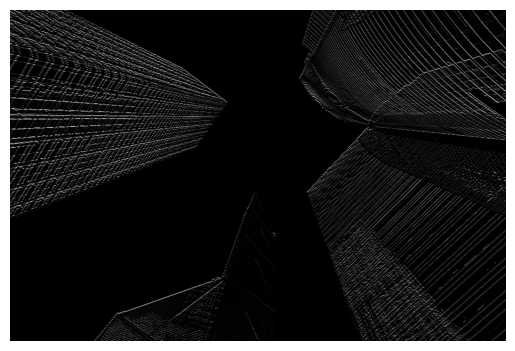

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 입력 이미지를 읽어옵니다.
image = plt.imread("/content/drive/MyDrive/image/text.jpg")

# 이미지를 흑백으로 변환합니다.
gray_image = np.mean(image, axis=-1)

# 이미지의 크기를 450x450 픽셀로 조정합니다.
gray_image = gray_image[::6, ::6]

# 필터를 정의합니다. (수평 방향의 엣지를 감지하는 필터)
filter_matrix = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])

# 이미지와 필터를 합성곱 연산합니다.
output_image = convolve2d(gray_image, filter_matrix, mode='same', boundary='symm')

# 음수 값을 0으로 만듭니다.
output_image = np.maximum(output_image, 0)

# 결과를 플로팅합니다.
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

